# Flash Attention:  Intuition


### Understanding Modularity in Attention Matrices

#### Why Attention Matrices Tend to Be Modular

1. **Local Dependencies**
   - **Natural Language Processing (NLP) Example**:
     - **Sentence Structure**: In NLP, words in a sentence have strong dependencies on their neighboring words. For instance, in the phrase "the quick brown fox," the word "quick" is more related to "brown" than to a distant word like "jumps."
     - **Local Attention**: Attention mechanisms often focus on these local dependencies, resulting in a block-diagonal structure where each word attends to its nearby words, forming modular blocks along the main diagonal of the attention matrix.

2. **Hierarchical Structure**
   - **Hierarchical Data**:
     - **Document Structure**: Documents have a hierarchical structure, with sections, paragraphs, sentences, and words. Each level in this hierarchy tends to have internal dependencies that are stronger than those between different levels.
     - **Hierarchical Attention**: In tasks like document classification, attention mechanisms can focus on specific sections or paragraphs, leading to modular blocks corresponding to these hierarchical levels.

3. **Efficiency and Scalability**
   - **Computational Constraints**:
     - **Efficiency**: Processing entire sequences without considering modularity can be computationally expensive and memory-intensive. By focusing on smaller, more relevant sections of the sequence, attention mechanisms can be more efficient.
     - **Scalability**: Modularity allows attention mechanisms to scale to longer sequences by reducing the complexity of the attention computation. This is particularly important in tasks involving long documents or time-series data.

4. **Sparsity and Redundancy Reduction**
   - **Sparse Interactions**:
     - **Sparse Attention**: In many real-world applications, interactions are sparse, meaning that only a small subset of elements in the sequence interacts strongly with each other. This leads to a sparse attention matrix with non-zero values concentrated in specific blocks.
     - **Redundancy Reduction**: By focusing attention on these sparse interactions, modularity helps reduce redundancy in computations, leading to more efficient processing.

5. **Semantic Coherence**
   - **Semantic Relationships**:
     - **Coherent Blocks**: In tasks involving semantic relationships, such as image captioning or machine translation, certain parts of the input have strong internal coherence. For example, words describing a specific object in an image are likely to attend to each other.
     - **Modular Attention**: This internal coherence results in modular blocks within the attention matrix, where each block captures the semantic relationships within a coherent subset of the input.

#### Multi-Scale Attention and Stacking Layers

- **Local Modularity at Initial Layers**: The initial layers of a transformer focus on capturing local dependencies, resulting in modular blocks at a small scale.
- **Stacking Attention Layers**: As more layers are stacked, each subsequent layer builds on the representations from the previous layers, gradually capturing longer-range dependencies and more abstract relationships.
- **Multi-Scale Representation**: Lower layers capture fine-grained details, while higher layers capture broader context, resulting in a multi-scale attention mechanism that combines local and global information.

### Graphically Drawing Modular Matrices

In LaTeX, we can represent modular matrices graphically using block matrix notation. Let's first illustrate a modular attention matrix and then discuss the computational complexity of efficient versus inefficient matrix multiplication.

#### Modular Attention Matrix

Consider a modular attention matrix for a sequence of length 12, divided into 3 blocks of size 4:

$
\mathbf{A} = 
\begin{bmatrix}
\mathbf{A}_1 & 0 & 0 \\
0 & \mathbf{A}_2 & 0 \\
0 & 0 & \mathbf{A}_3
\end{bmatrix}
$

Here, $\mathbf{A}_1$, $\mathbf{A}_2$, and $\mathbf{A}_3$ are smaller sub-matrices (blocks) that focus on local dependencies. Each block is a 4x4 matrix, and the zeros represent no direct attention between elements in different blocks.

### Matrix Multiplication: Efficient vs. Inefficient

#### Inefficient Matrix Multiplication

In traditional (inefficient) matrix multiplication, we consider the entire matrix without leveraging its block structure. For two matrices $\mathbf{A}$ and $\mathbf{B}$, the multiplication $\mathbf{C} = \mathbf{A} \cdot \mathbf{B}$ requires:

$
C_{ij} = \sum_{k=1}^n A_{ik} B_{kj}
$

For a matrix of size $n \times n$, this involves $O(n^3)$ operations.

#### Efficient Matrix Multiplication

In efficient matrix multiplication, we exploit the block structure. For our modular matrix $\mathbf{A}$, we can multiply each block independently:

$
\mathbf{C} = 
\begin{bmatrix}
\mathbf{A}_1 & 0 & 0 \\
0 & \mathbf{A}_2 & 0 \\
0 & 0 & \mathbf{A}_3
\end{bmatrix}
\begin{bmatrix}
\mathbf{B}_1 & 0 & 0 \\
0 & \mathbf{B}_2 & 0 \\
0 & 0 & \mathbf{B}_3
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{A}_1 \cdot \mathbf{B}_1 & 0 & 0 \\
0 & \mathbf{A}_2 \cdot \mathbf{B}_2 & 0 \\
0 & 0 & \mathbf{A}_3 \cdot \mathbf{B}_3
\end{bmatrix}
$

Here, each block multiplication $\mathbf{A}_i \cdot \mathbf{B}_i$ involves $O(m^3)$ operations for block size $m \times m$. If we have $k$ blocks, the total complexity becomes $O(k \cdot m^3)$, where $k \cdot m = n$. Therefore, the efficient method has a complexity of:

$
O\left( \frac{n}{m} \cdot m^3 \right) = O(n \cdot m^2)
$

This is more efficient than the $O(n^3)$ complexity of the traditional method, especially for small $m$.




#### Reducing Memory Usage

**Traditional Attention Mechanism**:
- In traditional attention mechanisms, the computation of attention scores and weighted sums involves storing large intermediate matrices.
- For a sequence of length $n$ and an embedding dimension $d$, we typically compute the attention scores as a matrix of size $n \times n$, which can become very large for long sequences.
- Additionally, storing all intermediate results for backpropagation during training further increases memory usage.

**Flash Attention**:
- Flash attention uses more efficient memory access patterns to minimize these large intermediate matrices.
- Instead of storing the entire $n \times n$ attention score matrix, it processes smaller chunks at a time, reducing the peak memory usage.
- This chunking approach leverages temporal locality in memory access patterns, ensuring that the data needed next is already in the cache, thus reducing memory access time and usage.

#### Speeding Up Computations

**Traditional Attention Mechanism**:
- Traditional attention mechanisms perform a lot of redundant computations, especially when dealing with long sequences.
- The computation of attention scores involves multiple matrix multiplications and normalizations, which can be slow for large matrices.
- These operations are often memory-bound, meaning the speed is limited by how fast data can be moved in and out of memory.

**Flash Attention**:
- Flash attention takes advantage of modern hardware capabilities, such as parallel processing units (GPUs or TPUs) and optimized memory access.
- By breaking down the attention computation into smaller chunks, it allows for better parallelization, where multiple chunks can be processed simultaneously.
- It uses optimized libraries and hardware instructions to speed up matrix multiplications and softmax computations, reducing the overall computation time.
- The reduced memory usage also means less data movement, which further speeds up the computations.

#### Maintaining Accuracy

**Traditional Attention Mechanism**:
- Accuracy in traditional attention mechanisms comes from the precise computation of attention scores and the weighted sum of value vectors.
- Any optimization or approximation that alters these computations can potentially degrade performance.

**Flash Attention**:
- Flash attention ensures that despite optimizations, the fundamental computations remain the same.
- The chunking approach used in flash attention does not approximate or alter the attention scores or the weighted sum; it simply reorganizes the computation to be more efficient.
- By maintaining the integrity of these computations, flash attention preserves the accuracy of the attention mechanism.
- Additionally, any numerical stability techniques (e.g., careful handling of floating-point operations) are incorporated to prevent accuracy loss during optimized computations.

### Illustrative Example

To better understand these points, let's consider a simple example of matrix multiplication, which is at the heart of attention mechanisms.

**Traditional Approach**:
- Multiply two large matrices directly, storing the entire result matrix in memory before proceeding to the next step.
- This can quickly exhaust available memory and slow down computations due to frequent memory access.

**Optimized Approach (Flash Attention)**:
- Break down the matrices into smaller sub-matrices or tiles.
- Multiply corresponding sub-matrices, store only necessary intermediate results, and combine the results at the end.
- This reduces memory usage and takes advantage of parallel processing to speed up the multiplication.

Here’s a simplified analogy:
- Imagine you have a huge book to read, but you have a small table. Instead of trying to spread the entire book out on the table, you tear out one chapter at a time, read it, and then move on to the next. This way, you use your table space efficiently and read more quickly without getting overwhelmed.

In conclusion, flash attention reduces memory usage by processing data in smaller chunks, speeds up computations by leveraging modern hardware capabilities and efficient memory access patterns, and maintains accuracy by ensuring the core computations remain unchanged. This makes it a highly practical and efficient optimization for attention mechanisms in neural networks.

## Chunking example

To illustrate the concept of chunking within the code, you would need to implement an approach where the attention mechanism processes smaller subsections (chunks) of the sequence at a time. Here is a modified version of the code that explicitly demonstrates chunking:

In [2]:
import torch
import torch.nn.functional as F

class FlashAttention(torch.nn.Module):
    def __init__(self, embed_dim, num_heads, chunk_size=32):
        super(FlashAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.chunk_size = chunk_size  # Define the chunk size for splitting
        
        self.query_linear = torch.nn.Linear(embed_dim, embed_dim)
        self.key_linear = torch.nn.Linear(embed_dim, embed_dim)
        self.value_linear = torch.nn.Linear(embed_dim, embed_dim)
        self.out_linear = torch.nn.Linear(embed_dim, embed_dim)
        
    def forward(self, queries, keys, values, mask=None):
        batch_size, seq_length, embed_dim = queries.size()
        
        # Linear projections
        queries = self.query_linear(queries).view(batch_size, seq_length, self.num_heads, self.head_dim)
        keys = self.key_linear(keys).view(batch_size, seq_length, self.num_heads, self.head_dim)
        values = self.value_linear(values).view(batch_size, seq_length, self.num_heads, self.head_dim)
        
        # Transpose for attention computation
        queries = queries.transpose(1, 2)  # (batch_size, num_heads, seq_length, head_dim)
        keys = keys.transpose(1, 2)        # (batch_size, num_heads, seq_length, head_dim)
        values = values.transpose(1, 2)    # (batch_size, num_heads, seq_length, head_dim)
        
        attention_output = torch.zeros_like(values)
        
        for i in range(0, seq_length, self.chunk_size):
            chunk_queries = queries[:, :, i:i+self.chunk_size]
            chunk_keys = keys[:, :, i:i+self.chunk_size]
            chunk_values = values[:, :, i:i+self.chunk_size]
            
            # Scaled dot-product attention for the chunk
            scores = torch.matmul(chunk_queries, chunk_keys.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
            
            if mask is not None:
                chunk_mask = mask[:, :, i:i+self.chunk_size]
                scores = scores.masked_fill(chunk_mask == 0, float('-inf'))
            
            attention_weights = F.softmax(scores, dim=-1)
            
            # Apply attention weights to values
            chunk_output = torch.matmul(attention_weights, chunk_values)
            
            # Store the chunk output in the final output tensor
            attention_output[:, :, i:i+self.chunk_size] = chunk_output
        
        # Concatenate heads
        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, seq_length, embed_dim)
        
        # Final linear projection
        output = self.out_linear(attention_output)
        
        return output

# Example usage
embed_dim = 64
num_heads = 8
seq_length = 128
batch_size = 2
chunk_size = 32  # Define chunk size

queries = torch.randn(batch_size, seq_length, embed_dim)
keys = torch.randn(batch_size, seq_length, embed_dim)
values = torch.randn(batch_size, seq_length, embed_dim)

flash_attention = FlashAttention(embed_dim, num_heads, chunk_size)
output = flash_attention(queries, keys, values)

print(output.shape)  # Expected output shape: (batch_size, seq_length, embed_dim)


torch.Size([2, 128, 64])


## Key Points:

* Chunk Size Definition: The chunk_size parameter is introduced to control the size of each chunk.
* Chunking Loop: The attention computation is performed inside a loop that processes chunks of the sequence (lines inside the for loop).
* Chunk Processing: Each chunk of the queries, keys, and values is processed separately, and their outputs are stored in the final output tensor.

This approach explicitly demonstrates how chunking can be used to reduce memory usage and improve computational efficiency in the attention mechanism.

### Why Chunking Works in Flash Attention

#### Modularity and Block-Diagonal Structure

Attention matrices in many applications, particularly those involving long sequences, often exhibit a modular, block-diagonal structure. This means that attention scores are primarily focused around the main diagonal, reflecting the fact that elements in the sequence are more likely to interact with their nearby neighbors than with distant elements. This natural locality in the data is a key reason why chunking works effectively in flash attention mechanisms.

### Key Points

1. **Local Attention**:
   - **Modularity**: Many tasks, such as natural language processing, involve strong local dependencies where elements interact mostly with their immediate neighbors. This creates a block-diagonal pattern in the attention matrix.
   - **Efficiency**: Chunking leverages this locality by processing smaller blocks of the sequence independently, which aligns with the natural modularity in the data.

2. **Memory Efficiency**:
   - **Reduced Intermediate Storage**: Traditional attention mechanisms require storing large intermediate matrices for the entire sequence, which can quickly exhaust memory. Chunking reduces this memory usage by processing smaller sections of the sequence at a time.
   - **Cache Optimization**: Smaller chunks fit better in the processor's cache, minimizing the time spent moving data between different levels of memory and improving computational speed.

3. **Computational Efficiency**:
   - **Parallel Processing**: By breaking the sequence into smaller chunks, the computations can be parallelized more effectively. Each chunk can be processed independently, making better use of parallel processing capabilities of modern hardware like GPUs.
   - **Avoiding Redundancy**: Chunking focuses computations on smaller, relevant sections of the sequence, avoiding redundant calculations that would occur if processing the entire sequence at once.

### Practical Implications

- **Efficiency Gains**: By processing smaller, more manageable chunks, flash attention reduces memory usage and computation time, making it scalable for longer sequences.
- **Maintaining Accuracy**: Chunking does not alter the fundamental computations of the attention mechanism but reorganizes them to be more efficient. This ensures that the accuracy of the attention mechanism is preserved.
- **Real-World Applications**: This approach is particularly beneficial in real-world applications where sequences can be very long, such as in natural language processing, where sentences or documents can contain many words.

### Conclusion

Chunking works effectively in flash attention mechanisms because it aligns with the modular, block-diagonal structure often found in attention matrices. By processing smaller chunks, flash attention optimizes memory usage, computational speed, and maintains accuracy, making it a highly practical optimization for handling long sequences in attention-based models.




In many applications, especially those involving long sequences, attention matrices do exhibit modularity, often appearing as blocks along the main diagonal. This block structure reflects the fact that, in many practical tasks, attention is often local. For example, in natural language processing, the meaning of a word is typically influenced more by its surrounding words than by words far away in the sequence.

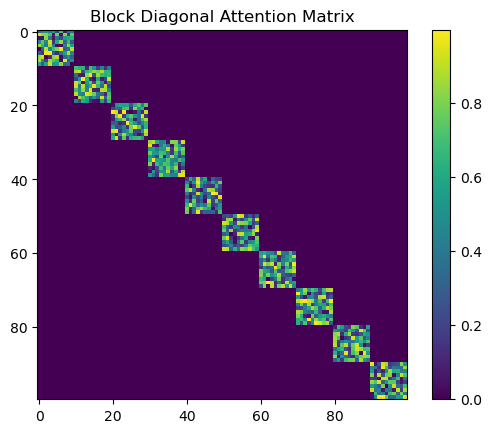

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def generate_block_diagonal_attention_matrix(seq_length, block_size):
    attention_matrix = np.zeros((seq_length, seq_length))
    for i in range(0, seq_length, block_size):
        end = min(i + block_size, seq_length)
        attention_matrix[i:end, i:end] = np.random.rand(end - i, end - i)
    return attention_matrix

seq_length = 100
block_size = 10
attention_matrix = generate_block_diagonal_attention_matrix(seq_length, block_size)

plt.imshow(attention_matrix, cmap='viridis')
plt.colorbar()
plt.title('Block Diagonal Attention Matrix')
plt.show()

### Explanation:

1. **Block Diagonal Matrix Generation**:
   - The `generate_block_diagonal_attention_matrix` function creates a sequence-length by sequence-length matrix with blocks along the diagonal.
   - Each block represents local attention within a window of `block_size`.

2. **Visualization**:
   - The `imshow` function from `matplotlib` visualizes the attention matrix, showing how attention is distributed locally in blocks.

### Implications for Flash Attention

- **Efficiency**: Leveraging the block structure in attention matrices can significantly reduce memory usage and computation time.
- **Implementation**: Flash attention mechanisms can take advantage of this by focusing computations on the blocks rather than the entire matrix.
- **Scalability**: This modular approach allows the attention mechanism to scale to longer sequences by ensuring that only relevant parts of the sequence are attended to, avoiding the quadratic complexity of traditional attention.

### Conclusion

Attention matrices often exhibit a modular, block-diagonal structure, especially when local attention mechanisms are used. This structure can be exploited by flash attention to improve efficiency and scalability without sacrificing accuracy. Understanding and leveraging this modularity is key to optimizing attention mechanisms for practical applications.